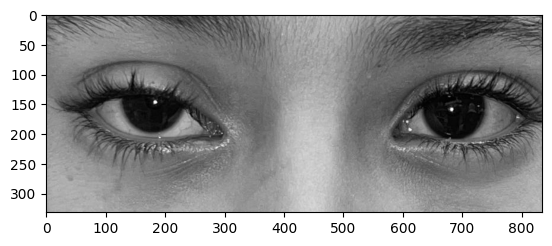

Dilated edges


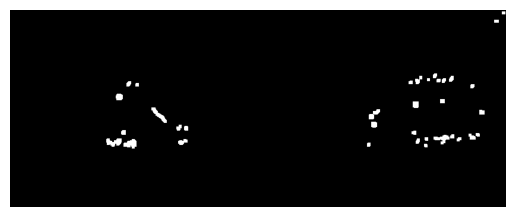

TypeError: 'NoneType' object is not subscriptable

In [1]:
# for when loading from modules that we wrote ourselves and changing them: you don't have to reload the notebook again
%load_ext autoreload
%autoreload 2
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import numpy as np
from utils import *
# image = cv2.imread('sample_1.jpg',cv2.IMREAD_GRAYSCALE)
# #show the image
# plt.imshow(image,cmap='gray')
# plt.show()
img=get_eyes('sample_1.jpg')
plt.imshow(img,cmap='gray')
plt.show()

# kernel = make_circular_kernel((11,11),5)
# rectangular kernel
kernel = np.ones((5,5),np.uint8)

lowcanny=450
highcanny=500
iterations=1

edges = cv2.Canny(img,lowcanny,highcanny)


# print("Canny edges")
# plt.imshow(edges,cmap='gray')
# plt.axis('off')
# plt.show()

edges = cv2.dilate(edges,kernel,iterations=iterations) 

print("Dilated edges")
plt.imshow(edges,cmap='gray')
plt.axis('off')
plt.show()

circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT,1, 60,param1=200,param2=12,minRadius=30,maxRadius=70)
print(circles[0])
for x,y,r in circles[0]:
    # draw the outer circle
    cv2.circle(img,(int(x),int(y)),int(r),(0,255,0),2)
    # draw the center of the circle
    cv2.circle(img,(int(x),int(y)),2,(0,0,255),3)

# show the image
plt.imshow(img,cmap='gray')